# Big Data Mart Sales Problem

Feature variables:
   * Item_Identifier
   * Item_Weight
   * Item_Fat_Content	
   * Item_Visibility
   * Item_Type
   * Item_MRP
   * Outlet_Identifier
   * Outlet_Establishment_Year
   * Outlet_Size
   * Outlet_Location_Type
   * Outlet_Type	
   
Target variable:
   * Item_Outlet_Sales

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

In [3]:
train_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
test_data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:
train_data.shape

(8523, 12)

In [6]:
test_data.shape

(5681, 11)

In [7]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [8]:
test_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

# DATA CLEANING

In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Null values are present in two columns of train dataset,they are:

Item_Weight
Outlet_Size

In [10]:
train_data['Item_Weight']=train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean())
train_data['Outlet_Size']=train_data['Outlet_Size'].fillna(train_data['Outlet_Size'].mode()[0])

In [11]:
train_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

Null values present in two columns of test dataset,they are:

Item_Weight
Outlet_Size

In [13]:
test_data['Item_Weight']=test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean())
test_data['Outlet_Size']=test_data['Outlet_Size'].fillna(test_data['Outlet_Size'].mode()[0])

In [14]:
test_data.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

Now there is no null values in train and test dataset.

In [ ]:
                                Chech the elements of Item_Fat_Content

In [15]:
train_data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [16]:
test_data['Item_Fat_Content'].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

Convert low fat and LF as Low Fat and reg as Regular in both train and test data

In [17]:
train_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

In [18]:
test_data['Item_Fat_Content'].replace(['low fat','LF','reg'],['Low Fat','Low Fat','Regular'],inplace=True)

                                    Check the data types

In [19]:
train_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [20]:
test_data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
dtype: object

There are seven object data type in train and test dataset,so we convert data object into float type by encoding technique

In [21]:
enc=OrdinalEncoder()

In [22]:
for i in train_data.columns:
    if train_data[i].dtypes=="object":
        train_data[i]=enc.fit_transform(train_data[i].values.reshape(-1,1))

In [23]:
for i in test_data.columns:
    if test_data[i].dtypes=="object":
        test_data[i]=enc.fit_transform(test_data[i].values.reshape(-1,1))

In [24]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.016047,4.0,249.8092,9.0,1999,1.0,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.019278,14.0,48.2692,3.0,2009,1.0,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.016760,10.0,141.6180,9.0,1999,1.0,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,0.0,1998,1.0,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1.0,1987,0.0,2.0,1.0,994.7052


In [25]:
test_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103.0,20.750000,0.0,0.007565,13.0,107.8622,9.0,1999,1.0,0.0,1.0
1,1067.0,8.300000,1.0,0.038428,4.0,87.3198,2.0,2007,1.0,1.0,1.0
2,1406.0,14.600000,0.0,0.099575,11.0,241.7538,0.0,1998,1.0,2.0,0.0
3,809.0,7.315000,0.0,0.015388,13.0,155.0340,2.0,2007,1.0,1.0,1.0
4,1184.0,12.695633,1.0,0.118599,4.0,234.2300,5.0,1985,1.0,2.0,3.0


# ANALYSIS

                                 Visualizing the nominal data

In [26]:
train_data_visualization_nominal=train_data[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
                                'Outlet_Location_Type','Outlet_Type']].copy()

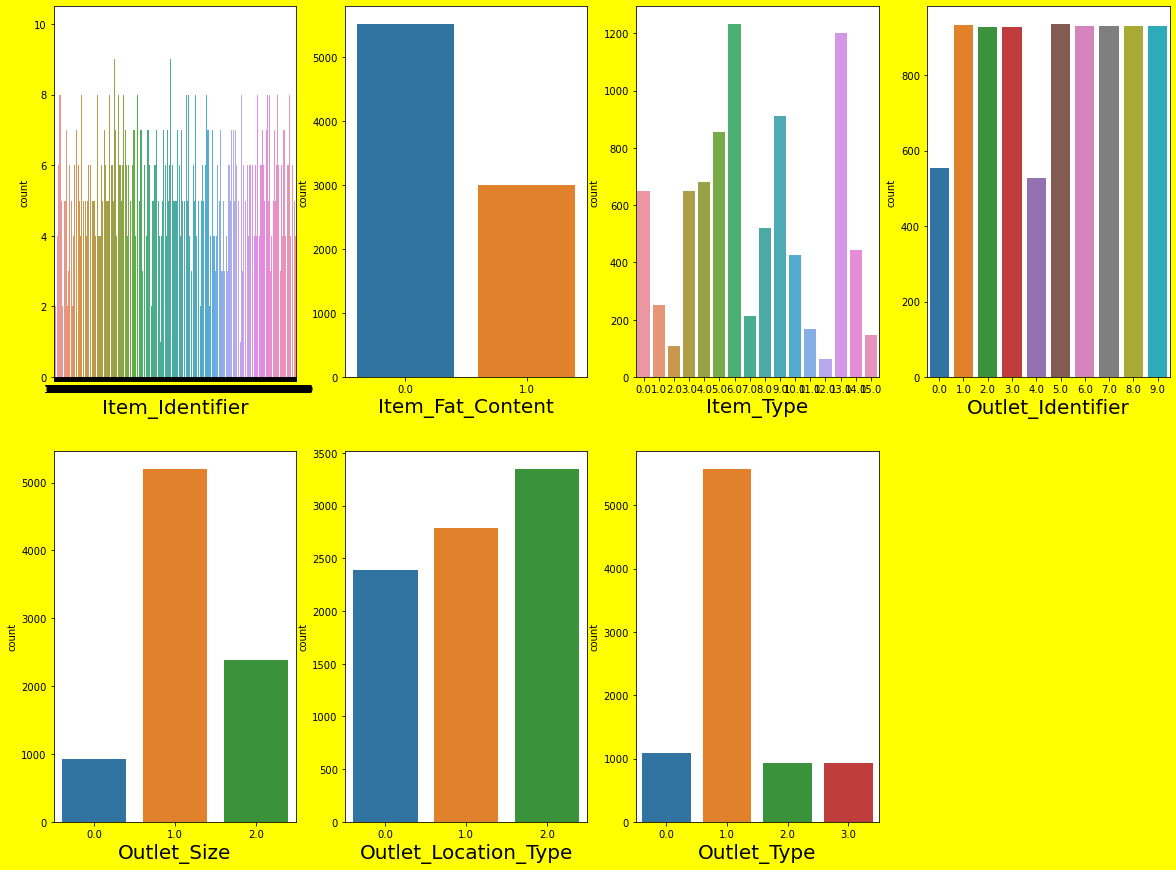

In [27]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber =1

for column in train_data_visualization_nominal:
    if plotnumber <=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.countplot(train_data_visualization_nominal[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

In [29]:
test_data_visualization_nominal=test_data[['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size',
                                'Outlet_Location_Type','Outlet_Type']].copy()

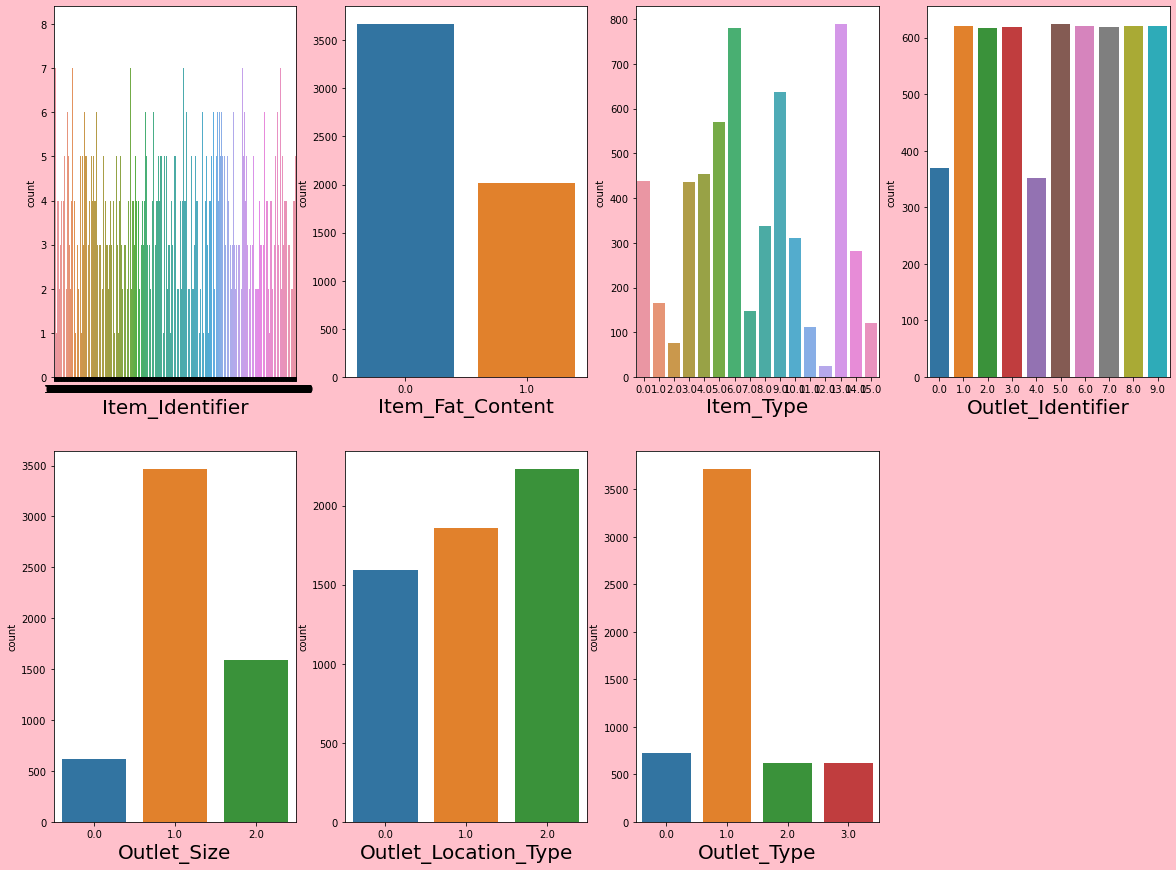

In [30]:
plt.figure(figsize=(20,15),facecolor='pink')
plotnumber =1

for column in test_data_visualization_nominal:
    if plotnumber <=7:
        ax = plt.subplot(2,4,plotnumber)
        sns.countplot(test_data_visualization_nominal[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                    Visualizing the continuous dataset

In [31]:
train_data_visualization_continuous=train_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year',
                                    'Item_Outlet_Sales']].copy()

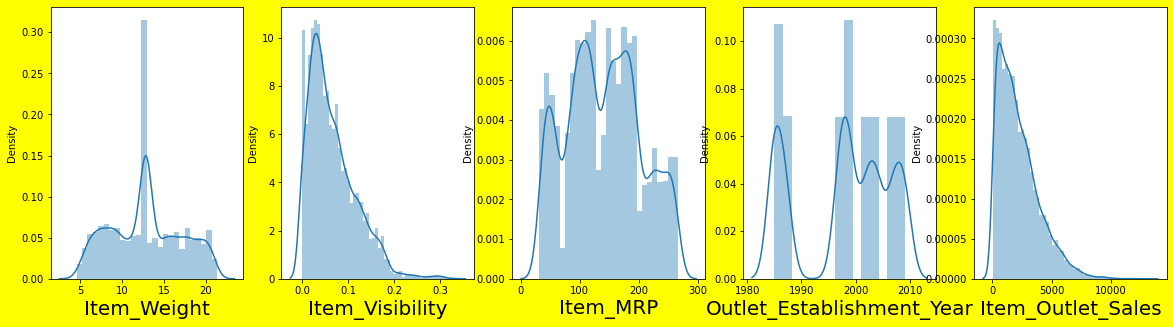

In [32]:
plt.figure(figsize=(20,5),facecolor = 'yellow')
plotnumber =1

for column in train_data_visualization_continuous:
    if plotnumber <=5:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(train_data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

In [33]:
test_data_visualization_continuous=test_data[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year']].copy()

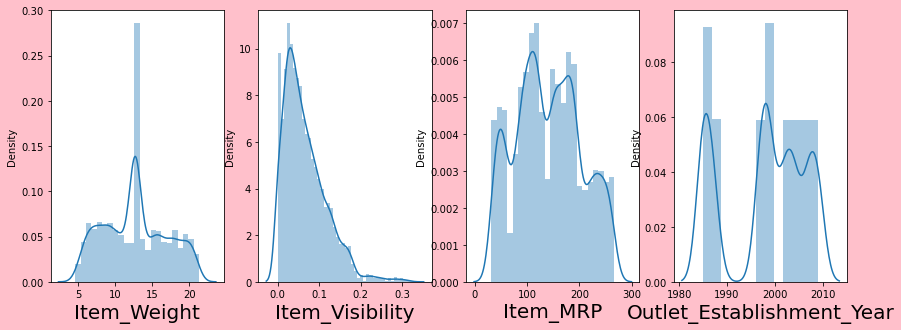

In [34]:
plt.figure(figsize=(18,5),facecolor = 'pink')
plotnumber =1

for column in test_data_visualization_continuous:
    if plotnumber <=4:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(test_data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show()   

                                      Describe the data set

In [35]:
train_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000,13086.964800


<AxesSubplot:>

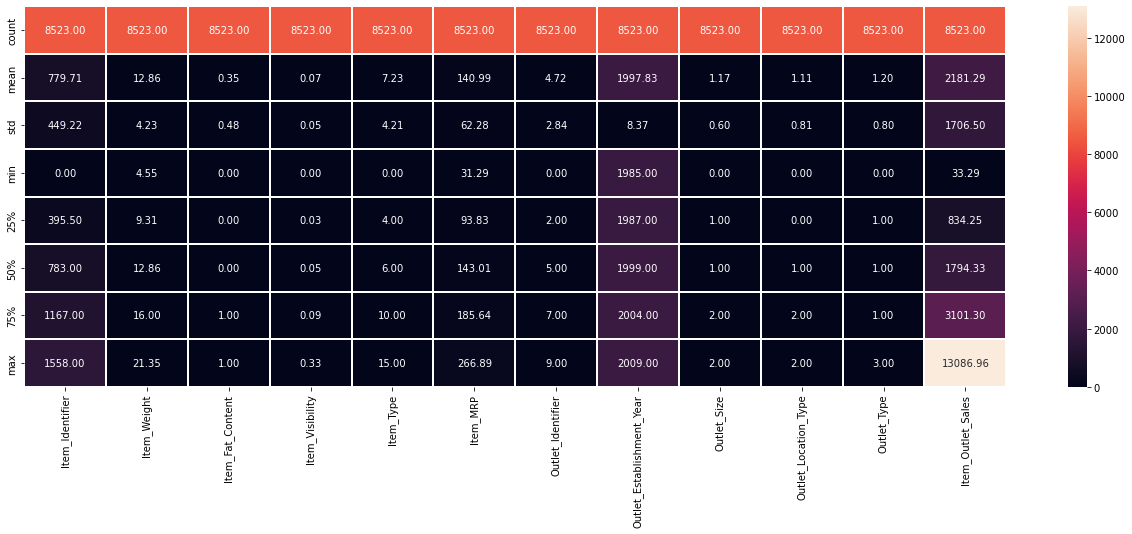

In [36]:
plt.figure(figsize=(22,7))
sns.heatmap(train_data.describe(),annot=True,linewidth=0.1,fmt='0.2f')

In [ ]:
There is no null values 

There are 8523 rows and 12 columns

The mean, std, minimum and maximum values are:
    
    * Item_Identifier:
        mean = 779.714
        std = 449.222
        minimum = 0.000
        maximum =1558.000
        
    * Item_Weight:
        mean = 12.857
        std = 4.226
        minimum = 4.555
        maximum = 21.350
        
    * Item_Fat_Content:
        mean = 0.352
        std = 0.477
        minimum = 0.000
        maximum = 1.000
        
    * Item_Visibility:
        mean = 0.066
        std = 0.051
        minimum = 0.000
        maximum = 0.382
        
    * Item_Type:
        mean = 7.226
        std = 4.209
        minimum = 0.000
        maximum = 15.000
        
    Item_MRP:
        mean = 140.992
        std = 62.275
        minimum = 31.290
        maximum = 266.888
        
    * Outlet_Identifier:
        mean = 4.722
        std = 2.837
        minimum = 0.000
        maximum = 9.000
        
    * Outlet_Establishment_Year:
        mean = 1997.831
        std = 8.371
        minimum = 1985
        maximum = 2009
        
    * Outlet_Size:
        mean = 1.170
        std = 0.600
        minimum = 0.000
        maximum = 2.000
        
    * Oulet_Location_Type:
        mean = 1.112
        std = 0.812
        minimum = 0.000
        maximum = 2.000
        
    * Outlet_Type:
        mean = 1.201
        std = 0.796
        minimum = 0.000
        maximum = 3.000
        

In [37]:
test_data.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000,5681.000000
mean,773.386376,12.695633,0.354339,0.065684,7.233410,141.023273,4.722760,1997.828903,1.170921,1.112832,1.201373
std,445.525926,4.245189,0.478355,0.051252,4.219057,61.809091,2.837201,8.372256,0.600328,0.812824,0.796740
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.990000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,382.000000,9.195000,0.000000,0.027047,4.000000,94.412000,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,771.000000,12.695633,0.000000,0.054154,6.000000,141.415400,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1160.000000,15.850000,1.000000,0.093463,10.000000,186.026600,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1542.000000,21.350000,1.000000,0.323637,15.000000,266.588400,9.000000,2009.000000,2.000000,2.000000,3.000000


<AxesSubplot:>

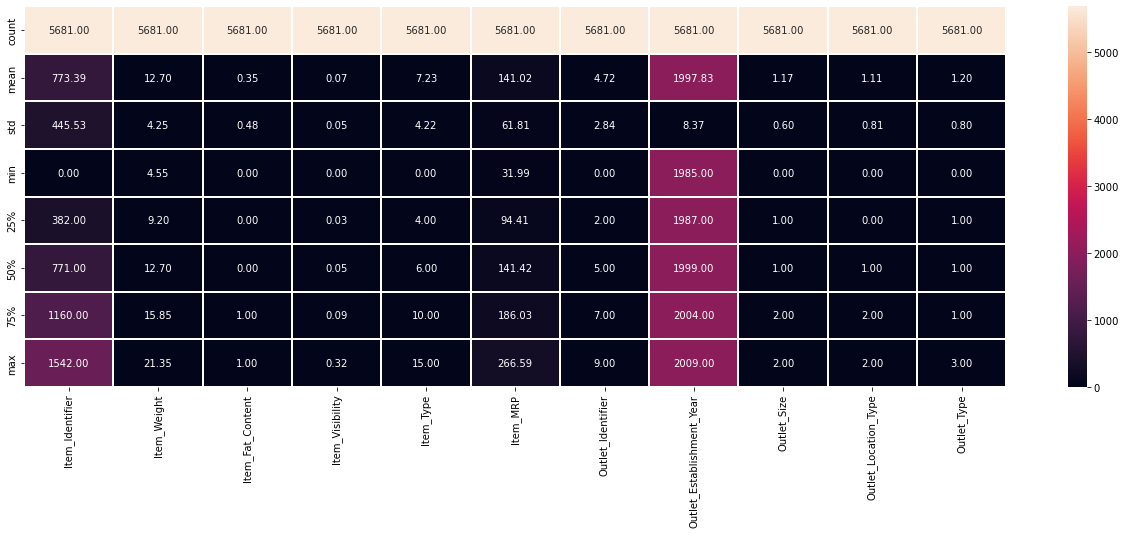

In [38]:
plt.figure(figsize=(22,7))
sns.heatmap(test_data.describe(),annot=True,linewidth=0.1,fmt='0.2f')

In [ ]:
There is no null values 

There are 5681 rows and 11 columns

The mean, std, minimum and maximum values are:
    
    * Item_Identifier:
        mean = 773.386
        std = 445.525
        minimum = 0.000
        maximum = 1542.000
        
    * Item_Weight:
        mean = 12.695
        std = 4.245
        minimum = 4.555
        maximum = 21.350
        
    * Item_Fat_Content:
        mean = 0.354
        std = 0.478
        minimum = 0.000
        maximum = 1.000
        
    * Item_Visibility:
        mean = 0.065
        std = 0.051
        minimum = 0.000
        maximum = 0.323
        
    * Item_Type:
        mean = 7.233
        std = 4.21
        minimum = 0.000
        maximum = 15.000
        
    Item_MRP:
        mean = 141.023
        std = 61.809
        minimum = 31.990
        maximum = 266.588
        
    * Outlet_Identifier:
        mean = 4.722
        std = 2.837
        minimum = 0.000
        maximum = 9.000
        
    * Outlet_Establishment_Year:
        mean = 1997.828
        std = 8.372
        minimum = 1985.000
        maximum =2009.000
        
    * Outlet_Size:
        mean = 1.170
        std = 0.600
        minimum = 0.000
        maximum = 2.000
        
    * Oulet_Location_Type:
        mean = 1.112
        std = 0.812
        minimum = 0.000
        maximum = 2.000
        
    * Outlet_Type:
        mean = 1.201
        std = 0.796
        minimum = 0.000
        maximum = 3.000
        

                                         Correlation

In [39]:
train_data.corr()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.044518,-0.114660,-0.025482,-0.017973,0.012853,-0.008602,-0.012772,0.001389,0.003656,-0.001178,0.002869
Item_Weight,0.044518,1.000000,-0.021157,-0.012049,0.028015,0.024756,-0.007975,-0.008301,-0.007225,0.004088,-0.000566,0.011550
Item_Fat_Content,-0.114660,-0.021157,1.000000,0.047314,-0.139434,0.006063,0.000764,0.003151,-0.000622,-0.001598,0.002199,0.018719
Item_Visibility,-0.025482,-0.012049,0.047314,1.000000,-0.035249,-0.001315,-0.100439,-0.074834,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.017973,0.028015,-0.139434,-0.035249,1.000000,0.032651,0.001656,0.004970,-0.001859,0.003084,0.003053,0.017048
Item_MRP,0.012853,0.024756,0.006063,-0.001315,0.032651,1.000000,0.003319,0.005020,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.008602,-0.007975,0.000764,-0.100439,0.001656,0.003319,1.000000,0.079035,0.504603,-0.716176,0.099873,0.162325
Outlet_Establishment_Year,-0.012772,-0.008301,0.003151,-0.074834,0.004970,0.005020,0.079035,1.000000,0.193389,-0.089216,-0.122304,-0.049135
Outlet_Size,0.001389,-0.007225,-0.000622,0.069309,-0.001859,0.006059,0.504603,0.193389,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,0.003656,0.004088,-0.001598,-0.028099,0.003084,0.000232,-0.716176,-0.089216,-0.614311,1.000000,0.467219,0.089367


<AxesSubplot:>

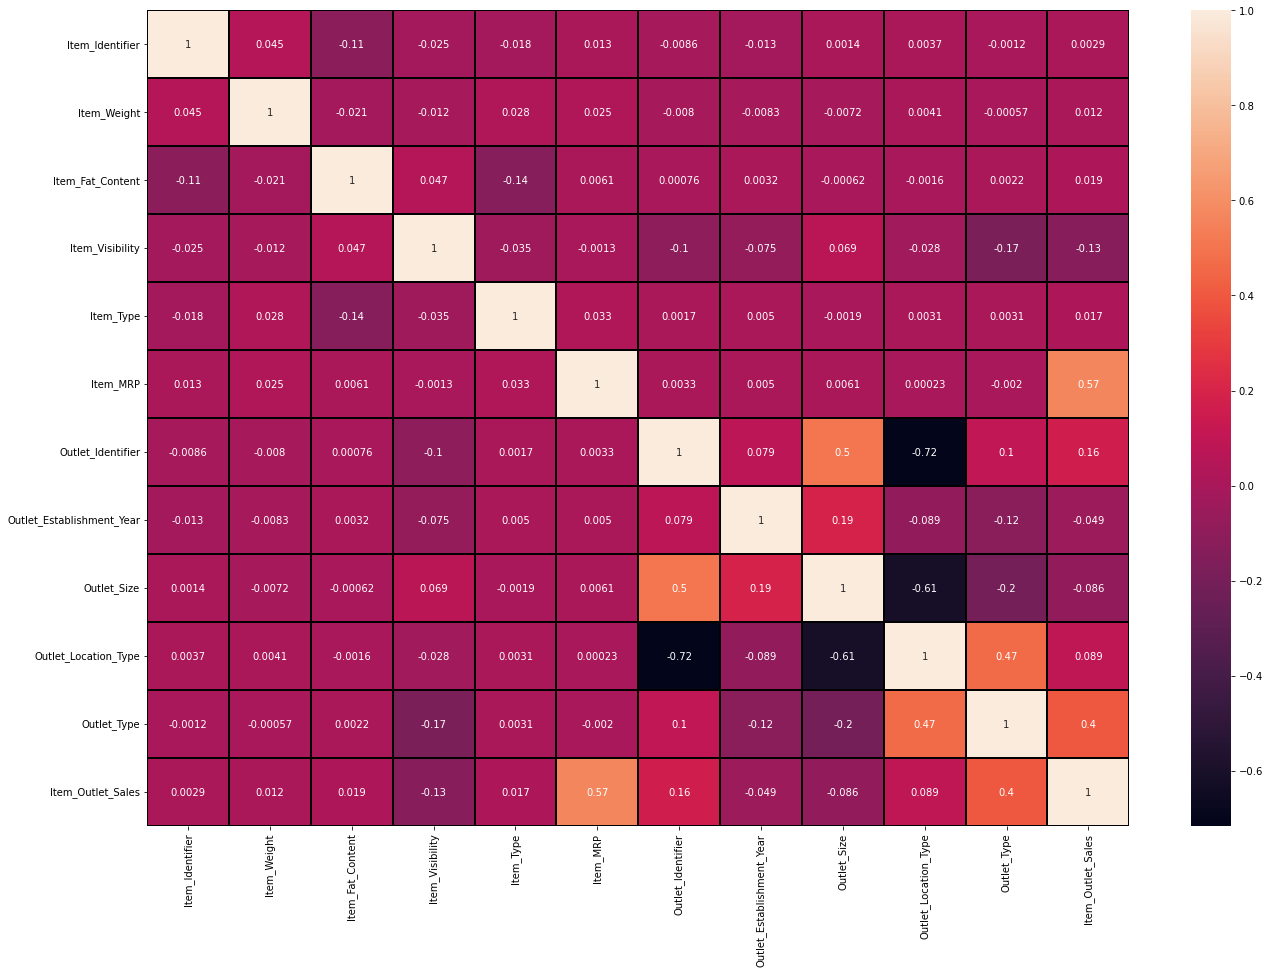

In [40]:
plt.figure(figsize=(22,15))
sns.heatmap(train_data.corr(),annot=True,linewidth=0.1,linecolor='black')

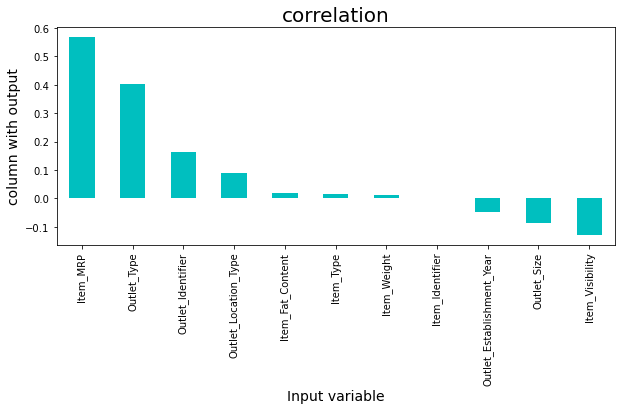

In [42]:
plt.figure(figsize=(10,4))
train_data.corr()['Item_Outlet_Sales'].sort_values(ascending=False).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Input variable',fontsize=14)
plt.ylabel('column with output',fontsize=14)
plt.title("correlation",fontsize=20)
plt.show()

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

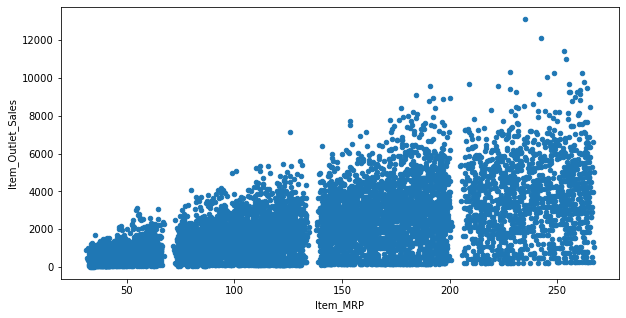

In [44]:
# Item_MRP and Item_Outlet_Sales has 57% correlation                                                       

train_data.plot(kind='scatter', x='Item_MRP', y='Item_Outlet_Sales',figsize=(10,5))

As MRP goes increasing so outlet sales also goes on increasing

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

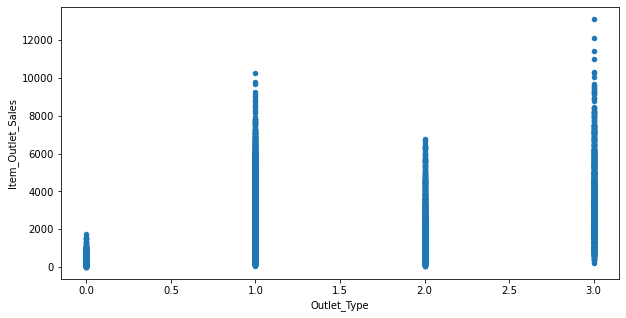

In [45]:
# Outlet_Type and Item_Outlet_Sales has 40% correlation                                                       

train_data.plot(kind='scatter', x='Outlet_Type', y='Item_Outlet_Sales',figsize=(10,5))

Supermarket Type1 and Supermarket Type3 Outlet sales are higher and Supermarket Type2 is also good in sales but Grocery Store
has minimum sales (approx to 2000 only)

                                         Outliers

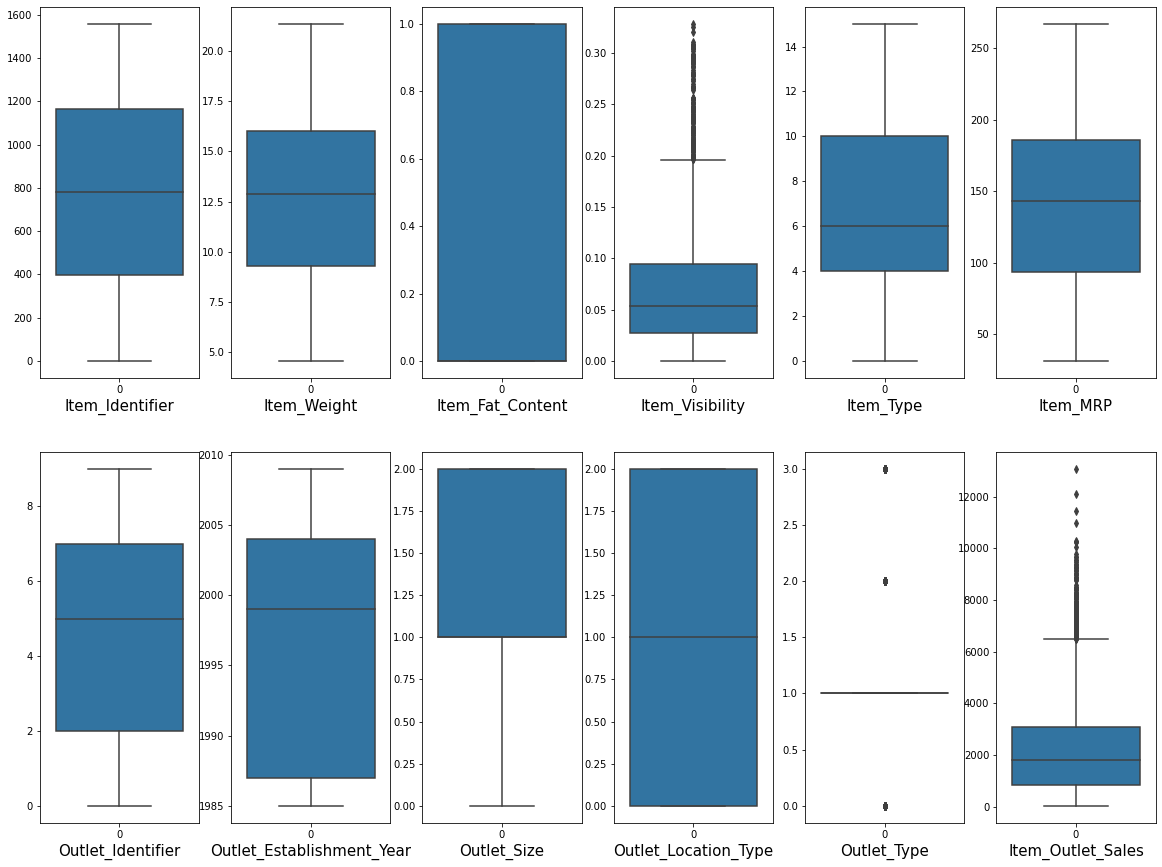

In [46]:
plt.figure(figsize=(20,15))
number = 1

for column in train_data:
    if number <=12:
        plt.subplot(2,6,number)
        ax = sns.boxplot(data=train_data[column])
        plt.xlabel(column,fontsize=15)
       
    number+=1
plt.show()    

Outliers is present in the Item_Visibility column

                                            Skewness

In [47]:
train_data.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility              1.167091
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Identifier           -0.059861
Outlet_Establishment_Year   -0.396641
Outlet_Size                 -0.087072
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Take thrashold range for skewness is (-0.5,0.5)

Skewness is present in :
    
    * Item_Visibility

                                    Variance Inflation Factor

In [48]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

In [50]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [51]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.802312,Item_Identifier
1,4.533368,Item_Weight
2,1.558692,Item_Fat_Content
3,2.657960,Item_Visibility
4,3.776794,Item_Type
5,3.913549,Item_MRP
6,10.136654,Outlet_Identifier
7,3.573892,Outlet_Establishment_Year
8,6.900043,Outlet_Size
9,9.171334,Outlet_Location_Type


There are four columns having VIF greater than 5 that are:
    
    * Outlet_Identifier
    * Outlet_Size
    * Outlet_Location_Type
    * Outlet_Type

We removed one by one column having higher VIF and then again check VIF values.
Here Outlet_Identifier has maximum value so we remove it from the table.

In [52]:
train_data=train_data.drop(['Outlet_Identifier'],axis=1)

In [53]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [54]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.666948,Item_Identifier
1,4.362196,Item_Weight
2,1.536718,Item_Fat_Content
3,2.627259,Item_Visibility
4,3.627875,Item_Type
5,3.790553,Item_MRP
6,3.394915,Outlet_Establishment_Year
7,5.996300,Outlet_Size
8,4.869755,Outlet_Location_Type
9,4.370135,Outlet_Type


Still Outlet_Size has VIF greater than 5 so we remove it.

In [55]:
train_data=train_data.drop(['Outlet_Size'],axis=1)

In [56]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [59]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(x_scaled,i)for i in  range(x_scaled.shape[1])]
vif['Input']= x.columns
vif

,VIF,Input
0,3.492864,Item_Identifier
1,4.177833,Item_Weight
2,1.515921,Item_Fat_Content
3,2.399282,Item_Visibility
4,3.470834,Item_Type
5,3.658082,Item_MRP
6,2.893282,Outlet_Establishment_Year
7,3.621007,Outlet_Location_Type
8,3.986640,Outlet_Type


In [58]:
test_data=test_data.drop(['Outlet_Identifier','Outlet_Size'],axis=1)

Now there is no multicolinearity present in the train and test datset

                                Remove skewness by taking square root

In [60]:
train_data['Item_Visibility']=np.sqrt(train_data['Item_Visibility'])

In [61]:
test_data['Item_Visibility']=np.sqrt(train_data['Item_Visibility'])

In [62]:
train_data.skew()

Item_Identifier             -0.008877
Item_Weight                  0.090561
Item_Fat_Content             0.616705
Item_Visibility             -0.098056
Item_Type                    0.101655
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Outlet_Location_Type        -0.209093
Outlet_Type                  0.927438
Item_Outlet_Sales            1.177531
dtype: float64

Now data is not skewed

In [63]:
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.126678,4.0,249.8092,1999,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.138846,14.0,48.2692,2009,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.129461,10.0,141.6180,1999,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,1998,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1987,2.0,1.0,994.7052


                                            Remove outliers

In [64]:
x=train_data.drop(['Item_Outlet_Sales'],axis=1)
y=train_data['Item_Outlet_Sales']

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [65]:
z=np.abs(zscore(x))

threshold=3

print(np.where(z>3))

(array([ 854, 1805, 2855, 3750, 7250], dtype=int64), array([3, 3, 3, 3, 3], dtype=int64))


In [66]:
train_data_new=train_data[(z<3).all(axis=1)]

In [67]:
print("Old data frame:",train_data.shape)
print("New data frame:",train_data_new.shape)
print("Total dropped rows:",train_data.shape[0]-train_data_new.shape[0])

Old data frame: (8523, 10)
New data frame: (8518, 10)
Total dropped rows: 5


In [68]:
loss_percentage=(8523-8518)/8523*100
print(loss_percentage,'%')

0.05866478939340608 %


In [69]:
train_data_new.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156.0,9.30,0.0,0.126678,4.0,249.8092,1999,0.0,1.0,3735.1380
1,8.0,5.92,1.0,0.138846,14.0,48.2692,2009,2.0,2.0,443.4228
2,662.0,17.50,0.0,0.129461,10.0,141.6180,1999,0.0,1.0,2097.2700
3,1121.0,19.20,1.0,0.000000,6.0,182.0950,1998,2.0,0.0,732.3800
4,1297.0,8.93,0.0,0.000000,9.0,53.8614,1987,2.0,1.0,994.7052


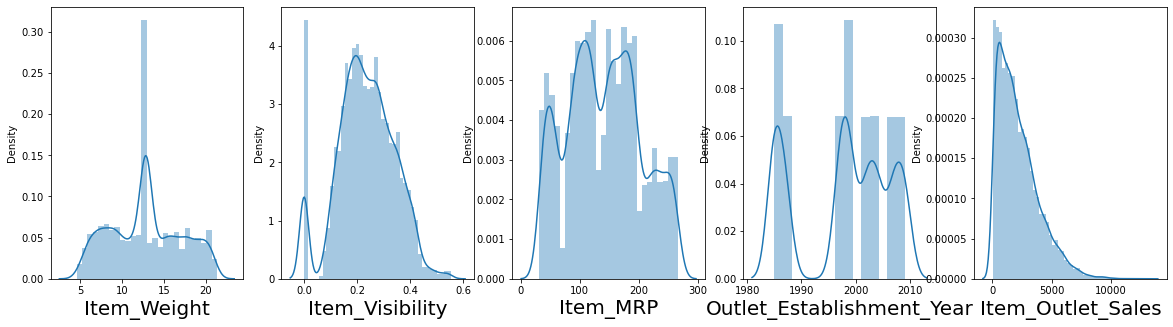

In [70]:
train_data_visualization_continuous=train_data_new[['Item_Weight','Item_Visibility','Item_MRP','Outlet_Establishment_Year',
                                    'Item_Outlet_Sales']].copy()

plt.figure(figsize=(20,5),facecolor = 'white')
plotnumber =1

for column in train_data_visualization_continuous:
    if plotnumber <=5:
        ax = plt.subplot(1,5,plotnumber)
        sns.distplot(train_data_visualization_continuous[column])
        plt.xlabel(column,fontsize=20)
        
    plotnumber+=1
plt.show() 

We remove Item_Identifier from train and test data because:

Item_Identifier has zero correlation with the dataset
There is large deviation in mean and std 

In [73]:
train_data_new=train_data_new.drop(['Item_Identifier'],axis=1)

In [75]:
test_data=test_data.drop(['Item_Identifier'],axis=1)

In [76]:
train_data_new.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,0.0,0.126678,4.0,249.8092,1999,0.0,1.0,3735.1380
1,5.92,1.0,0.138846,14.0,48.2692,2009,2.0,2.0,443.4228
2,17.50,0.0,0.129461,10.0,141.6180,1999,0.0,1.0,2097.2700
3,19.20,1.0,0.000000,6.0,182.0950,1998,2.0,0.0,732.3800
4,8.93,0.0,0.000000,9.0,53.8614,1987,2.0,1.0,994.7052


In [77]:
test_data.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type
0,20.750000,0.0,0.355918,13.0,107.8622,1999,0.0,1.0
1,8.300000,1.0,0.372620,4.0,87.3198,2007,1.0,1.0
2,14.600000,0.0,0.359806,11.0,241.7538,1998,2.0,0.0
3,7.315000,0.0,0.000000,13.0,155.0340,2007,1.0,1.0
4,12.695633,1.0,0.000000,4.0,234.2300,1985,2.0,3.0


# MODEL TESTING

In [79]:
x=train_data_new.drop(['Item_Outlet_Sales'],axis=1)
y=train_data_new['Item_Outlet_Sales']

In [80]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

                                      Linear Regression

In [81]:
lr=LinearRegression()

In [84]:
for i in range(0,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state = i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,2)==round(r2_score(y_test,pred_test)*100,2):
        print("The model perform very well")
        print("random state",i)
        print("Training accuracy score:",round(r2_score(y_train,pred_train)*100,2))
        print("Testing accuracy score:",round(r2_score(y_test,pred_test)*100,2))
        print('\n')

The model perform very well
random state 68
Training accuracy score: 49.88
Testing accuracy score: 49.88


The model perform very well
random state 493
Training accuracy score: 49.88
Testing accuracy score: 49.88


The model perform very well
random state 529
Training accuracy score: 49.88
Testing accuracy score: 49.88




In [85]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size = 0.20,random_state =529)

In [86]:
lr.fit(x_train,y_train)

LinearRegression()

In [87]:
pred_test=lr.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score for testing",accuracy)

R square score for testing 49.884603945164244


In [89]:
for j in range(2,10):
    cv_score=cross_val_score(lr,x_scaled,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean}")
    print("\n")

At cross fold 2 the cv score is 0.4977572990723598


At cross fold 3 the cv score is 0.49736761333590823


At cross fold 4 the cv score is 0.49670370202630343


At cross fold 5 the cv score is 0.49728891227599903


At cross fold 6 the cv score is 0.49693187848762216


At cross fold 7 the cv score is 0.49767285384982785


At cross fold 8 the cv score is 0.496945896756792


At cross fold 9 the cv score is 0.49713517536473784




In [90]:
lrscore=cross_val_score(lr,x_scaled,y,cv=2)
lrc=lrscore.mean()
print('cross val score:',lrc*100)

cross val score: 49.775729907235984


In [91]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 903.9511799571014
Mean square error: 1468306.989115041
Root mean square error: 1211.7371782342245


                                        Decision Tree Regressor

In [93]:
dtr=DecisionTreeRegressor()

In [94]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [95]:
pred_test=dtr.predict(x_test)
dtrs=r2_score(y_test,pred_test)
print("R2 score:",dtrs*100)

dtrscore=cross_val_score(dtr,x_scaled,y,cv=2)
dtrc=dtrscore.mean()
print('cross val score:',dtrc*100)

R2 score: 18.414106763882632
cross val score: 17.249593763408637


In [96]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 1090.3780030516432
Mean square error: 2390346.0150391352
Root mean square error: 1546.0743885852114


                                        Random Forest Regressor

In [97]:
dfr=RandomForestRegressor()

In [98]:
dfr.fit(x_train,y_train)

RandomForestRegressor()

In [99]:
pred_test=dfr.predict(x_test)
dfrs=r2_score(y_test,pred_test)
print("R2 score for testing:",dfrs*100)

dfrscore=cross_val_score(dfr,x_scaled,y,cv=2)
dfrc=dfrscore.mean()
print('cross val score:',dfrc*100)

R2 score for testing: 55.98709978299938
cross val score: 54.036892032584205


In [100]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 809.3898429600939
Mean square error: 1289512.8860028058
Root mean square error: 1135.5672089325253


                                   Ada Boost Regressor

In [102]:
ada= AdaBoostRegressor()

In [103]:
ada.fit(x_train,y_train)

AdaBoostRegressor()

In [104]:
pred_test=ada.predict(x_test)
adas=r2_score(y_test,pred_test)
print("R2 score:",adas*100)

adascore=cross_val_score(ada,x_scaled,y,cv=2)
adac=adascore.mean()
print('cross val score:',adac*100)

R2 score: 47.46072302573976
cross val score: 48.24002042999423


In [105]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 977.6290588614961
Mean square error: 1539323.1153944647
Root mean square error: 1240.6946100448993


                                    Gradient Boosting Regressor

In [106]:
gb= GradientBoostingRegressor()

In [107]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [108]:
pred_test=gb.predict(x_test)
accuracy=r2_score(y_test,pred_test)*100
print("R square score",accuracy)

gbscore=cross_val_score(gb,x_scaled,y,cv=2)
gbc=adascore.mean()
print('cross val score:',gbc*100)

R square score 60.58015765686506
cross val score: 48.24002042999423


In [109]:
mae=mean_absolute_error(y_test,pred_test)
mse=mean_squared_error(y_test,pred_test)
rmse=np.sqrt(mean_squared_error(y_test,pred_test))

print("Mean absolute error:",mae)
print("Mean square error:",mse)
print("Root mean square error:",rmse)

Mean absolute error: 760.7309319342454
Mean square error: 1154943.0829381428
Root mean square error: 1074.682782470317


Linear Regression:
    
    * r2_score = 49.88
    * cv_score = 49.77
    
Decision Tree Regressor:
    
    * r2_score = 18.41
    * cv_score = 17.24
    
Random Forest Regressor:
    
    * r2_score = 55.98
    * cv_score = 54.03
    
Ada Boost Regressor:
    
    * r2_score = 47.46
    * cv_score = 48.24
    
Gradient Boosting Regressor:
    
    * r2_score = 60.58
    * cv_score = 48.24
    
Linear Regression and Random Forest Regressor give better result but Linear Regression has Least difference between r2_score
and cv_score so we select it.

                                        LINEAR REGRESSION
    
    r2_score = 49.88
    cv_score = 49.77

# REGULARIZATION

In [110]:
from sklearn.linear_model import Lasso

In [121]:
parameters = {'alpha':[.0001,.001,.01,.1,1,10,100],
              'max_iter':range(0,100),
              'random_state':range(0,10),
              'normalize':[True,False]}

In [124]:
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'max_iter': 8, 'normalize': True, 'random_state': 0}


In [128]:
ls=Lasso(alpha=0.1,max_iter=8,normalize=True,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss = r2_score(y_test,pred_ls)*100
print("r2_score",lss)

cv_score=cross_val_score(ls,x_scaled,y,cv=2)
cv_mean=cv_score.mean()*100
print("cv_score",cv_mean)

r2_score 49.8695160378543
cv_score 49.7927012313221


                            Plot a graph b/w actual and predicted value

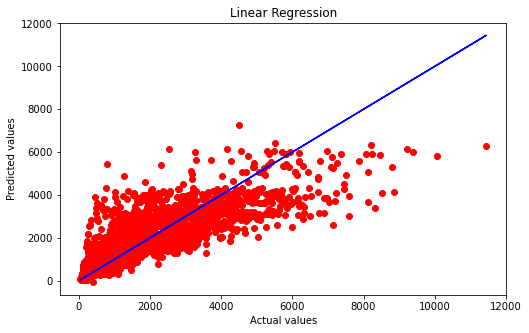

In [131]:
plt.figure(figsize=(8,5))
plt.scatter(y_test,pred_test,color='red')
plt.plot(y_test,y_test,color='blue')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Linear Regression')                                                                                
plt.show()

In [ ]:
The better r2 score is 49.88

                                    Save File

In [133]:
import pickle

In [136]:
filename='Big_Data_Mart_Sales.pkl'
pickle.dump(lr,open(filename,'wb'))

In [137]:
loaded_model= pickle.load(open('Big_Data_Mart_Sales.pkl','rb'))
result= loaded_model.score(x_test,y_test)
print(result)

0.4988460394516424


                                      Conclusion

In [139]:
Prediction=pd.DataFrame([loaded_model.predict(x_test)[:],pred_ls[:]],index=["Predicted value","Actual value"])
Prediction

,0,1,2,3,4,5,6,7,8,9,...,1694,1695,1696,1697,1698,1699,1700,1701,1702,1703
Predicted value,2761.956516,2605.366982,1110.545923,858.020648,177.946313,603.337335,438.647486,4905.050884,2385.655979,1234.481545,...,2315.914891,2045.367448,1351.071347,-57.690994,2916.916063,2916.880830,3889.311266,2385.102859,640.053799,1633.961377
Actual value,2752.382413,2574.672688,1124.304086,858.063750,215.779768,573.145173,461.824662,4875.003528,2392.386619,1255.210728,...,2320.764508,2075.799228,1383.712508,2.697950,2917.440694,2909.803863,3872.114587,2401.491967,658.143532,1631.397611
